# BOOMBIKES Bike Sharing Assignment

**Problem Statement:**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**The company wants to know:**

1. Which variables are significant in predicting the demand for shared bikes.
2. 
How well those variables describe the bike demand

**Assignment Goal:**

To build a multiple linear regression model for the prediction of demand for shared bikes

**Business Goal:**

1. The developed model will be used by company management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
2. Further, the model will be a good way for management to understand the demand dynamics of a new market. s

### <sub>1. Reading and Understanding Data</sub>

### <sub>2. Data Cleaning</sub>

#### <sub>2.1 Drop Columns Not Required for Analysis</sub>

#### <sub>2.2 Check and Handle Missing/Null Values</sub>

#### <sub>2.3 Handle Outliers, if Any</sub>

### <sub>3. Exploratory Data Analysis (EDA)</sub>

#### <sub>3.1 Data Standardization</sub>

#### <sub>3.2 Pair Plots to Find Linear Relationship</sub>

#### <sub>3.3 Analyze Categorical Variables with Target Variable</sub>

#### <sub>3.4 Analyze Numerical Variables with Target Variable</sub>

#### <sub>4. Data Preparation for Linear Regression</sub>

#### <sub>4.1 Dummy Variables Creation</sub>

### <sub>5. Model Preparation</sub>

#### <sub>5.1 Splitting Data into Training and Test Set</sub>

#### <sub>5.2 Feature Scaling of Continuous Variables</sub>

### <sub>6. Building Model using Recursive Feature Elimination (RFE)</sub>

#### <sub>7. Utility Functions - build_model and get_vif</sub>

#### <sub>7.1 Function to Build a Model Using Statsmodel API</sub>

#### <sub>7.2 Function to Calculate Variance Inflation Factors (VIFs)</sub>

### <sub>8. Build Model</sub>

### <sub>9. Model Evaluation</sub>

#### <sub>9.1 Residual Analysis</sub>

#### <sub>9.2 Linearity Check</sub>

#### <sub>9.3 Prediction for Test Data Set</sub>

#### <sub>9.4 R-Squared Value for Test Predictions</sub>

### <sub>10. Making Predictions and Conclusion</sub>


## Step 1: Reading and Understanding Data

Importing required libraries and read the bikesharing dataset

In [644]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warning
import warnings
warnings.filterwarnings('ignore')

In [645]:
bike_data_df = pd.read_csv("Assignment/LinearRegression/BikeSharingDataset.csv")
bike_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [646]:
#cheking the shape
bike_data_df.shape

(730, 16)

In [647]:
# check description
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The dataset has 730 rows and 16 columns. The dataset has no null values

In [648]:
# Check details of of numerical data
bike_data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

 #### 2.1: Drop columns which are not required for analysis
  - instant column as it is only a row identifier
  - casial and registered columns as both are added in cnt col
  - dteday col as we have already separate year and month cols

In [649]:
bike_data_df.drop(['instant'], axis=1, inplace=True)
bike_data_df.drop(['dteday'], axis=1, inplace=True)
bike_data_df.drop(['casual'], axis=1, inplace=True)
bike_data_df.drop(['registered'], axis=1, inplace=True)
bike_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [650]:
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


 #### 2.2: Check and handle missing/null values

In [651]:
bike_data_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

##### Inference - No null value found

 #### 2.3: Handle outliers , if any

In [652]:
#Handle ouliers
bike_data_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [653]:
# Print the unique value
bike_data_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

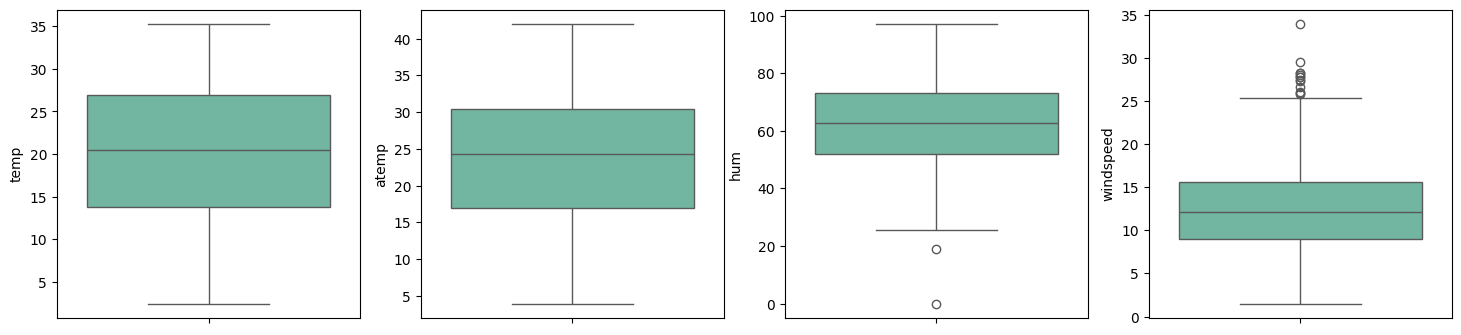

In [654]:
#Box plot for independent variables temp,atemp,hum,windspeed
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))

var = 1
for col in cols:
    plt.subplot(1,4,var)
    sns.boxplot(y=col, data=bike_data_df)
    var+=1

#### We can see that outliers are not present to be handled, hence no outlier treatment required.

## Step 3: EDA

Section:
##### Data standardization
##### Pair plots for linear relationship
##### Data Visualization for numerical
##### Correlation between variable - Heat map
##### Analyse categorical variables with target variablecategorical data

#### 3.1: Data Standardization

##### Season and weathersit to categorical variables

In [655]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
bike_data_df.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)

In [656]:
#weathersit : 
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy - good
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - moderate
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - bad
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - severe
bike_data_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace=True)

In [657]:
bike_data_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                           7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace=True)
bike_data_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace=True)
bike_data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### 3.2: Pair plots to find linear relationship

<Figure size 1500x3000 with 0 Axes>

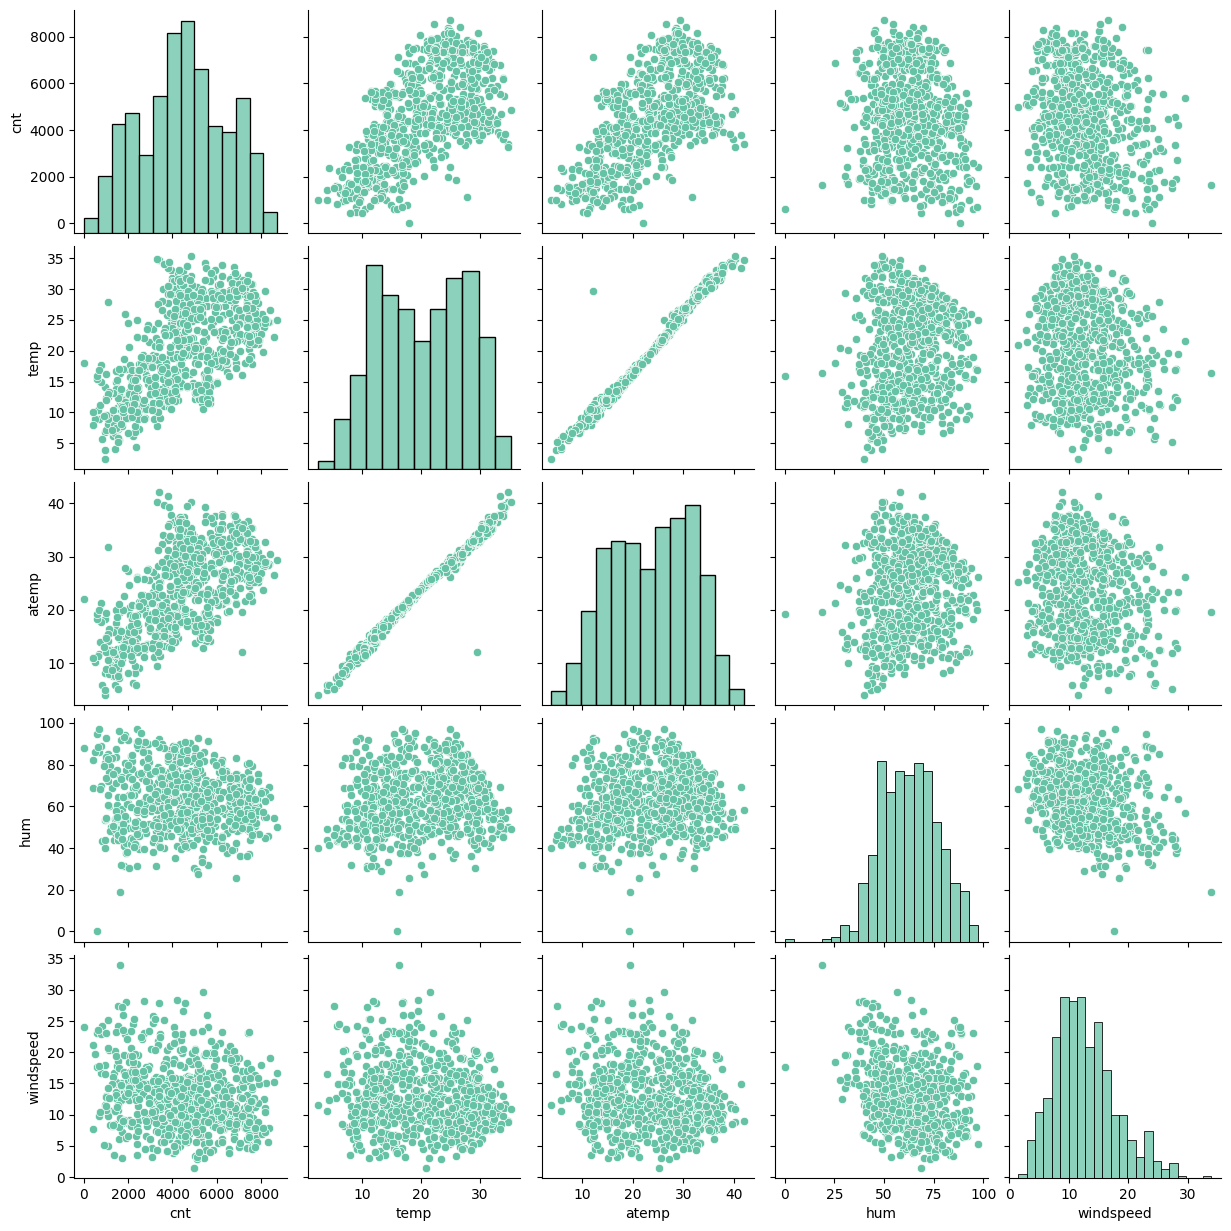

In [658]:
# Draw pairplot for continuous variable temp, atemp, hum, windspeed
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

##### Inference
    - Seems temp and atemp has highest correleation with target variable cnt
    - Also, temp and atemp are highly coorelated with each other
##### Output variable has linear relationship with independent variables like temp, atemp

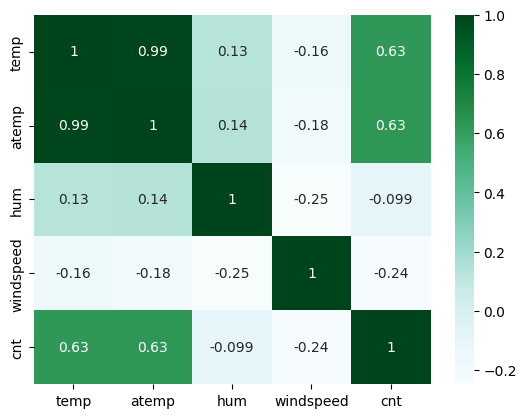

In [659]:
#### Heat Map to check continuous variables relationship with each other
sns.heatmap(bike_data_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

##### Inference :  temp and atemp has correleted about 0.99 , almost 1, and atemp seems to be derived from temp, However let us elminate it based on the Variance Inflation Factor later during the model building. 

#### 3.3: Analyse categorical variables with target variable

<function matplotlib.pyplot.show(close=None, block=None)>

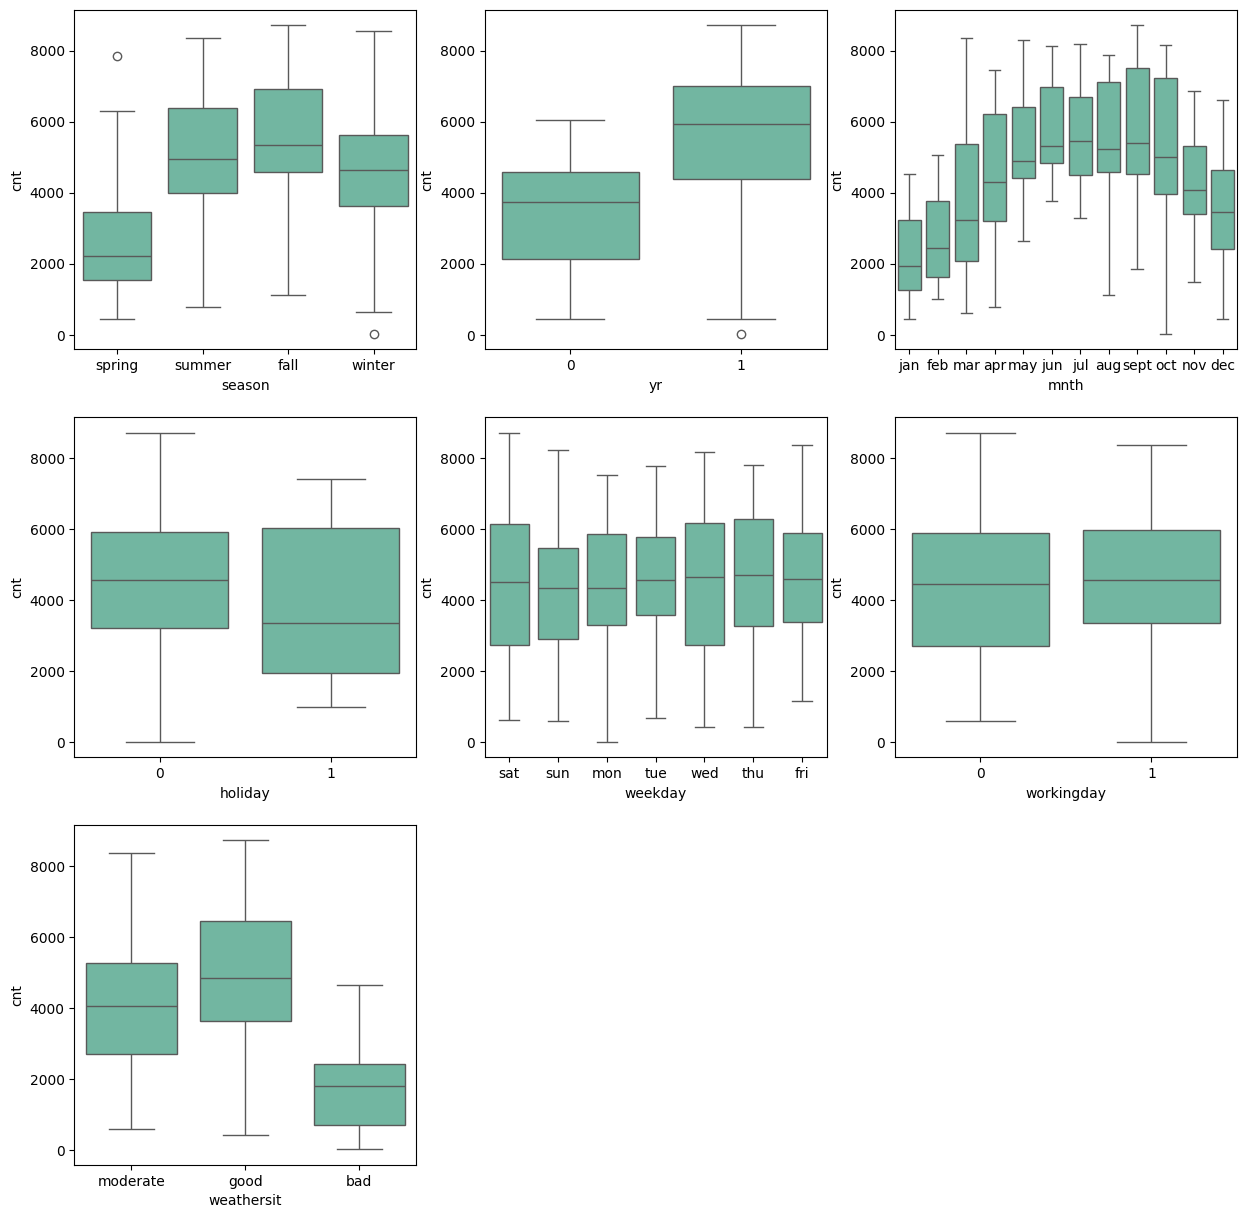

In [660]:
# Boxplot for categrorical variables
vars_category = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
sns.set_palette("Set2")
for i in enumerate(vars_category):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_data_df, x=i[1], y='cnt')
plt.show

##### Inference :  

1. Demand for bikes increases from spring season and its shows a increase trend and peaks at fall and then decline in winter
2. Bikes demands shows a growing trend every year
3. Demands is continuously growing till June, then demands remains approximately same , and peaks in Deptember and decline till december.The reason coluld be because of extreme weather, christmas.
4. Demands decreased during holidays
5. Demands in days onf week are almost similar, hence not giving any pattern or hint
6. Good weather has the highest demand

#### 3.4: Analyse numerical variables with target variable

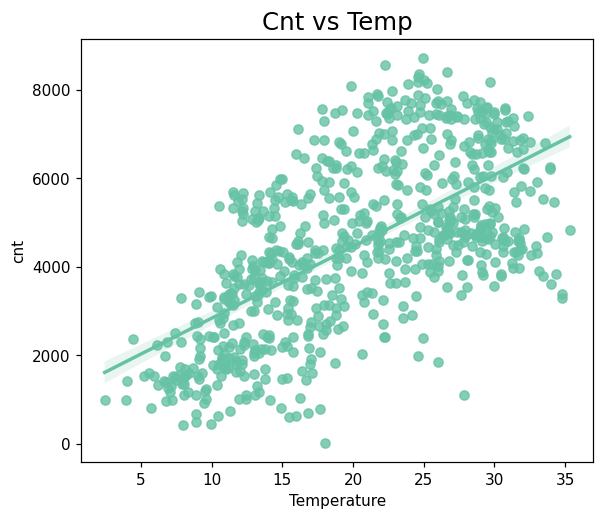

In [661]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_data_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

##### Inference :  

1. Demand for bikes is postively corelated with cnt
2. cnt is linearly increasing with temperature

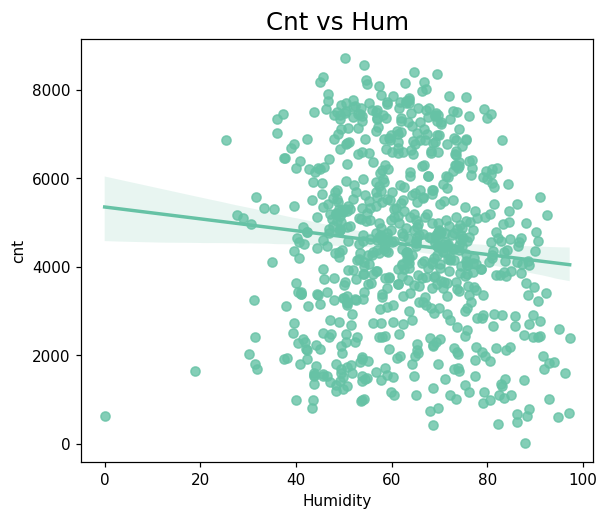

In [662]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_data_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

##### Inference :  

1. Humidity values are scattered
2. Negative slope, cnt decreases with increase in Humidity

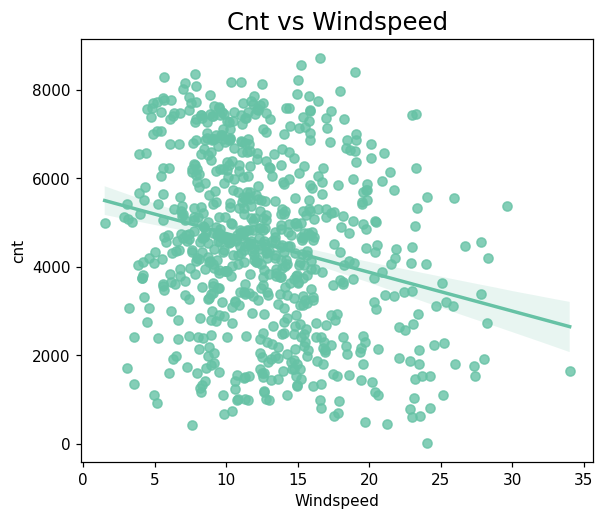

In [663]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_data_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

##### Inference :  

1. Windspeed values are also scattered
2. Negative slope, cnt decreases with increase in Windspeed

## Step 4: Data Preparation for Linear Regression  
   #### - 4.1 Dummy variables creation

In [664]:
# Dummy variable creation
bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [665]:
bike_data_df = pd.get_dummies(data=bike_data_df,columns=["season","mnth","weekday"],drop_first=True)
bike_data_df = pd.get_dummies(data=bike_data_df,columns=["weathersit"])
bike_data_df = bike_data_df.astype(int)

In [666]:
bike_data_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [667]:
col_to_convert = ['season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
bike_data_df[col_to_convert] = bike_data_df[col_to_convert].astype(int)
bike_data_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14,18,80,10,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14,17,69,16,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8,9,43,16,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


##  Step 5: Model Preparation  
   #### - Spliting data into trainig and test set
   #### - feature scaling of continuous variable

#### 5.1: Spliting data into trainig and test set

In [668]:
#check the shape
bike_data_df.shape

(730, 31)

In [669]:
# Extract the target variable in y
y = bike_data_df.pop('cnt')

In [670]:
# Rest all independent variable will be in X
X = bike_data_df

In [671]:
# Train test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [672]:
# Shape and Size of train and test 
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


In [673]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,15,19,70,12,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,26,30,49,20,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,13,16,76,12,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,26,29,79,4,0,0,1,...,0,0,0,0,0,0,1,0,0,1
625,1,0,1,25,28,87,23,0,0,0,...,1,0,0,0,0,1,0,0,0,1


#### 5.2: Feature Scaling of continuous variable

In [674]:
# To make all features in same scale
# Continuous variable - temp, atemp, hum, windspeed will be scaled
cont_var = ["temp", "atemp", "hum", "windspeed"]

#create object of MinMax scaler
scaler = MinMaxScaler()

# Scale the data
X_train[cont_var] = scaler.fit_transform(X_train[cont_var])

In [675]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.668627,0.547356,0.526194,0.649606,0.411111,0.231373,0.258824,0.24902,...,0.090196,0.149020,0.150980,0.152941,0.145098,0.131373,0.141176,0.029412,0.625490,0.345098
std,0.500106,0.163554,0.471169,0.226377,0.208213,0.143779,0.183980,0.422124,0.438419,0.43287,...,0.286744,0.356457,0.358381,0.360284,0.352545,0.338139,0.348545,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.536082,0.296296,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575758,0.564103,0.659794,0.370370,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.518519,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Inference
##### 1. All the Continuous variable - temp, atemp, hum, windspeed are scaled with minimum value 0 and maximum value 1

In [676]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
645,1,1,0,0.393939,0.410256,0.721649,0.407407,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.727273,0.692308,0.505155,0.703704,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.333333,0.333333,0.783505,0.407407,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.727273,0.666667,0.814433,0.111111,0,0,1,...,0,0,0,0,0,0,1,0,0,1
625,1,0,1,0.696970,0.641026,0.896907,0.814815,0,0,0,...,1,0,0,0,0,1,0,0,0,1


## Step 6: Building model using RFE

#### - We are using RFE automated approach to build the model as we have higher no of columns and so we will be using hybrid approach.
#### - In hybrid apprach, we will selecting the 15 columns given by RFE mechanism for our model creation. 
#### - Using RFE given 15 columns we will use manual elemination method to train and build our model 

In [677]:
# Build a Linear Regression model using SKLearn for RFE
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [678]:
rfe = RFE(lrm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [679]:
# Check the columns selected by RFE and their respective weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 16),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 12),
 ('mnth_jul', False, 2),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 15),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 14),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [680]:
# Columns selected by RFE and will be used elimination method
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

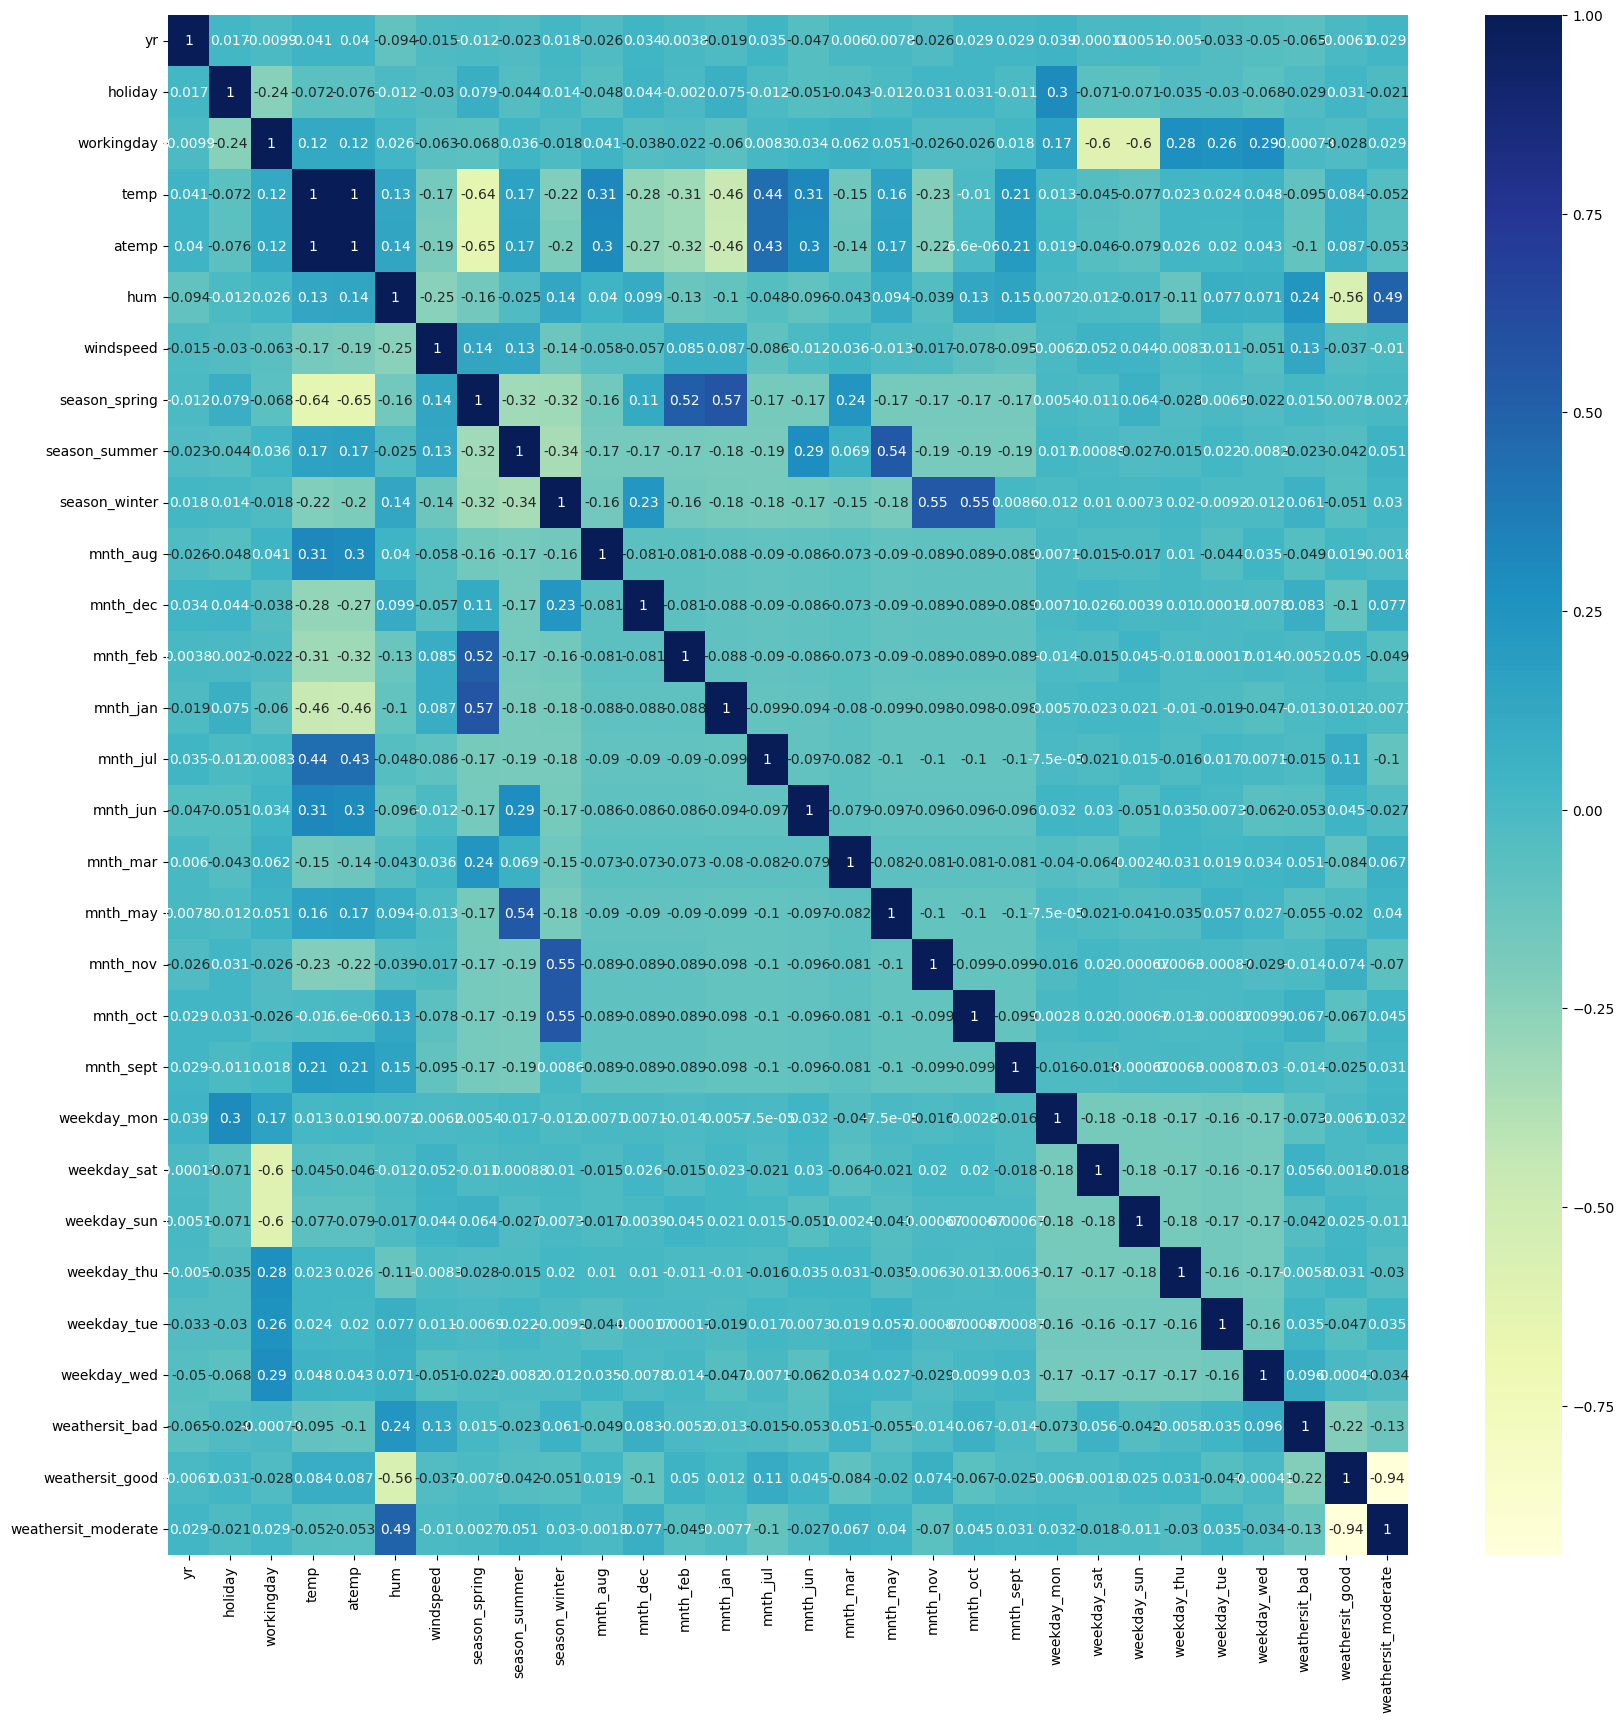

In [681]:
# Checking the correlation of all variables, just to check to check we can replace any columns suggested by RFE 
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### NOTE: We will replace the atemp with temp during our model building as both are highly correlated.We will take any one of them, her we are taking the temp variable.

In [682]:
# Taking the 15 columsn to create a new rfe dataframe for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [683]:
X_train_rfe.shape

(510, 15)

## Step 7: Utility functions - build_model and get_vif

#### 7.1: Function to build a model using statsmodel api

In [684]:
#Function to build a model using statsmodel api 
# Args : Selected columns for model as a parameter
def build_model(cols):
    X_train_sma = sm.add_constant(X_train[cols])
    l_model = sm.OLS(y_train, X_train_sma).fit()
    print(l_model.summary())
    return l_model

#### 7.2: Function to calculate VIFs


In [685]:
# Function to calculate and print VIFs and print them -
# Args - columns for which VIF to be calcualted
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Step 8: Build Model
#### Model 1 : All variables given by RFE

In [686]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.75e-181
Time:                        19:44:10   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     494   BIC:                             8352.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2406.6633    

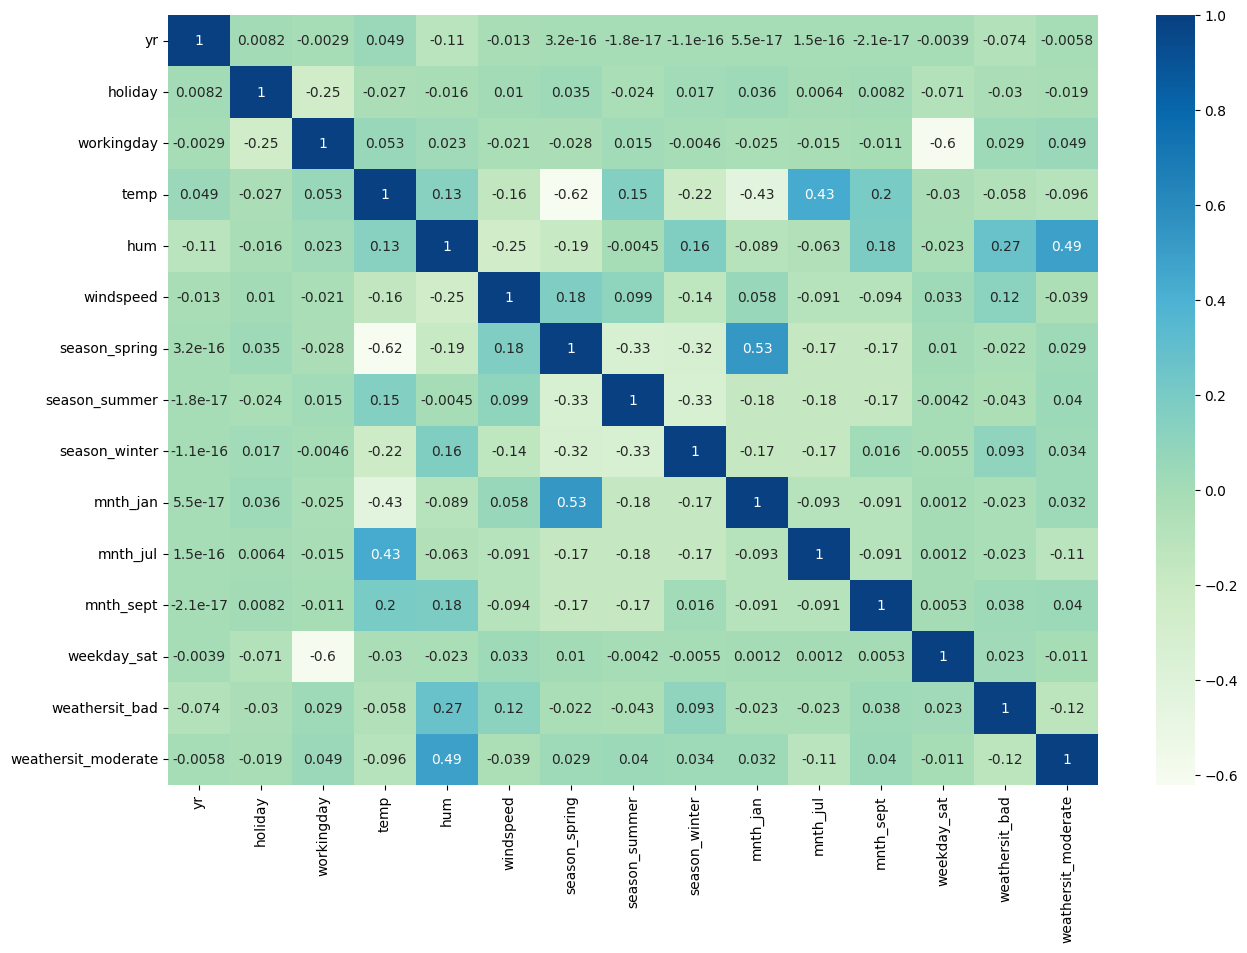

In [687]:
#Checking the coorelation of 15 columns
plt.figure(figsize = (15,10))
sns.heatmap(bike_data_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2 

In [688]:
# Dropping the variable month_jan as p value and higher and it has negative coefficient
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.42e-182
Time:                        19:44:14   Log-Likelihood:                -4126.4
No. Observations:                 510   AIC:                             8283.
Df Residuals:                     495   BIC:                             8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2389.5213    

#### Model 3

In [689]:
# Dropping the variable holiday as p value is higher and it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.53e-183
Time:                        19:44:14   Log-Likelihood:                -4128.0
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     496   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2325.9115    

#### Model 4

In [690]:
# Dropping the variable hum due to high VF and also has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.39e-180
Time:                        19:44:14   Log-Likelihood:                -4136.6
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     497   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1498.5090    

#### Model 5

In [691]:
# Dropping the variable mnth_jul due to high p value making it insignificant and also has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.59e-181
Time:                        19:44:15   Log-Likelihood:                -4138.3
No. Observations:                 510   AIC:                             8301.
Df Residuals:                     498   BIC:                             8351.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1434.5693    

#### Model 6

In [692]:
# Dropping the variable temp due to high VF
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     162.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          4.25e-150
Time:                        19:44:15   Log-Likelihood:                -4214.3
No. Observations:                 510   AIC:                             8451.
Df Residuals:                     499   BIC:                             8497.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4636.5287    

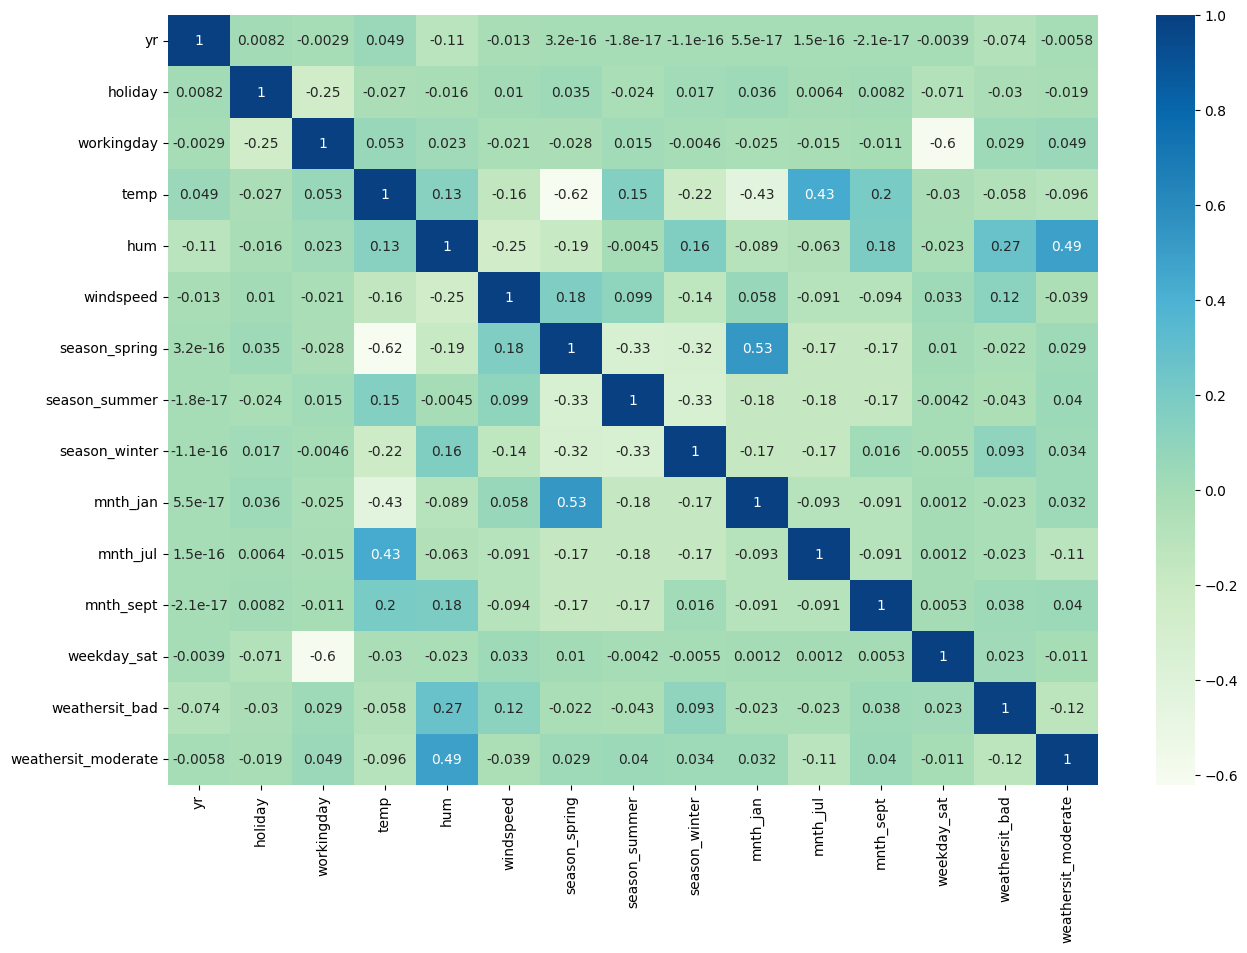

In [693]:
#Checking the coorelation of 15 columns
plt.figure(figsize = (15,10))
sns.heatmap(bike_data_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 7

In [694]:
## Trying to replace season_spring with mnth_jan as both were highly correlated
cols = ['yr', 'workingday', 'windspeed', 'mnth_jan',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     83.38
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          9.15e-100
Time:                        19:44:20   Log-Likelihood:                -4333.5
No. Observations:                 510   AIC:                             8689.
Df Residuals:                     499   BIC:                             8736.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3711.1599    

#### Model 8

In [695]:
## Trying to replace windspeed with season_spring as both were highly correlated
cols = ['yr', 'workingday', 'season_spring', 'mnth_jan',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     157.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.09e-147
Time:                        19:44:20   Log-Likelihood:                -4220.6
No. Observations:                 510   AIC:                             8463.
Df Residuals:                     499   BIC:                             8510.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4214.3755    

#### Model 9

In [696]:
## Adding Sunday as its holiday and people might take bikes for leisure ride. Replacing daturday as might possible that
# people will complete all their household work and keepp their sunday free
cols = ['yr', 'workingday', 'season_spring', 'mnth_jan',
       'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sun','weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.23e-146
Time:                        19:44:20   Log-Likelihood:                -4223.1
No. Observations:                 510   AIC:                             8468.
Df Residuals:                     499   BIC:                             8515.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4535.7607    

#### Model 10

In [697]:
## Taking variable temp again and dropping workingday
cols = ['yr', 'temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sun','weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          8.97e-179
Time:                        19:44:20   Log-Likelihood:                -4149.4
No. Observations:                 510   AIC:                             8319.
Df Residuals:                     500   BIC:                             8361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1446.1918    

#### Inference
##### 1. VIF's are within acceptable range
##### 2. p values of all featuire are  zero , expect one feature ie weekday_sun whihc is almost zero.
##### 3. R2 is 0.818
##### 4. We can go ahead with Model 10 as the target/final model.All the statictics are high (R2, Adjusted R2, F- statictics). Also there are no insignificant variables plus no multicolenearity,high VIF, variables
##### 5. The difference of R2 and Adjusted R2 is very less , hence there is no futher scope of dropping any variable.

In [698]:
# Function to build model using sklearn
def build_model(X,y):
    lrObj = LinearRegression()
    lrObj.fit(X,y)
    return lrObj

In [699]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sun','weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = build_model(X_train[cols],y_train)
print(lr.intercept_,lrObj.coef_)

1446.191758603105 [ 1992.30649094  4048.14423627  -779.0089699    444.89187443
   830.18305292   730.04102683  -352.46736685 -2313.57589481
  -670.8711647 ]


## Step 9: Model Evaluation

### 9.1: Residual Analysis

In [700]:
y_train_pred = lr.predict(X_train[cols])

In [701]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

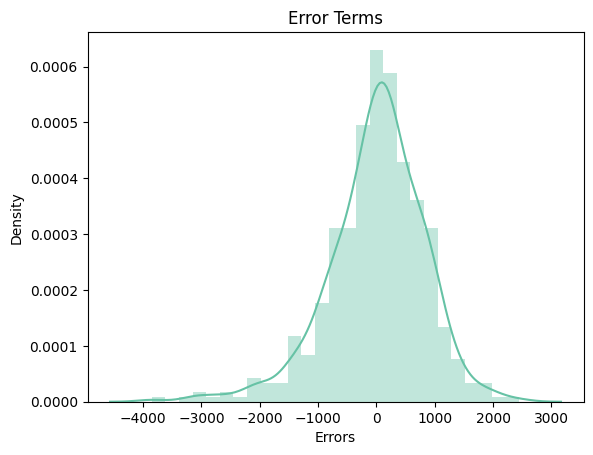

In [702]:
plot_res_dist(y_train, y_train_pred)

#### Inference :
 ##### - Errors are normally disctributed with mean 0. Model seems fine till now.

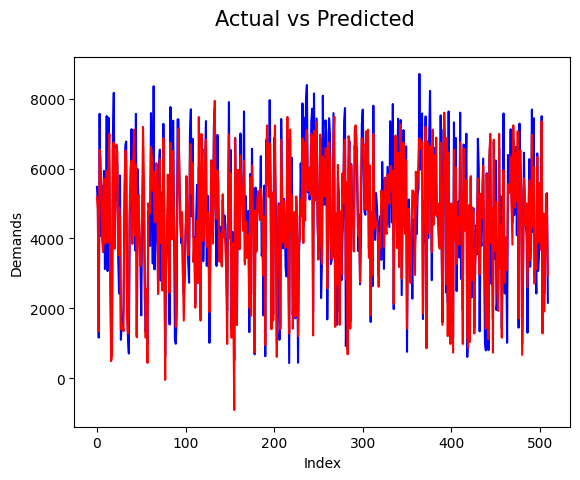

In [703]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and predicted are almost following the same pattern

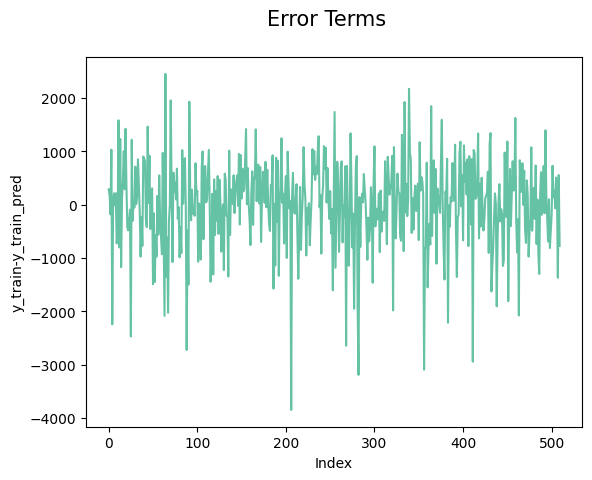

In [704]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [705]:
#R-squared Value
r2_score(y_train,y_train_pred)

0.8181712586459986

#### R2 is same wrt our final model 10.

### 9.2: Linearity Check

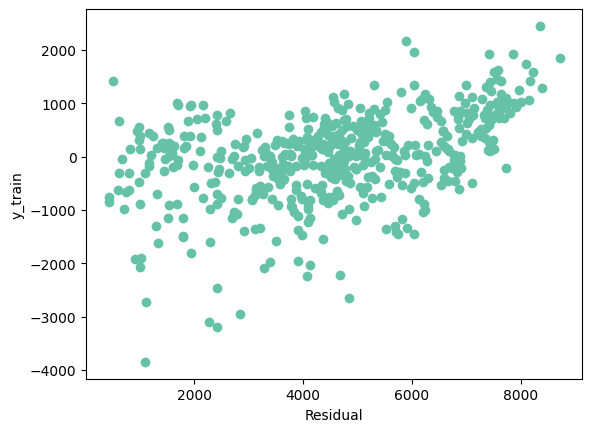

In [706]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 9.3: Predict for test data set

In [707]:
cont_var = ["temp", "atemp", "hum", "windspeed"]

# Transform the data
X_test[cont_var] = scaler.transform(X_test[cont_var])

In [708]:
# Columns of final model
cols = ['yr', 'temp','season_spring',
       'season_summer', 'season_winter', 'mnth_sept',
       'weekday_sun','weathersit_bad', 'weathersit_moderate']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 9.4: R-Squared value for test predictions

In [709]:
r2_score_test = r2_score(y_test,y_test_pred)
round(r2_score_test,3)

0.81

# Inference
   ##### R2 value for prediction on test data set(0.81) is almost equal to R2 value of train data(0.81). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

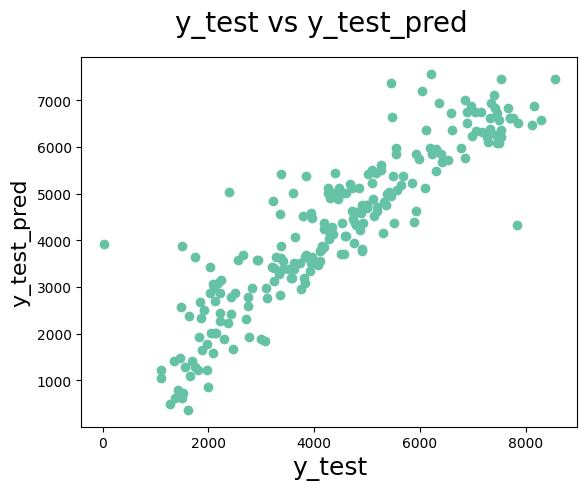

In [710]:
# Plotting y_test and y_test_pred

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference
##### - variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

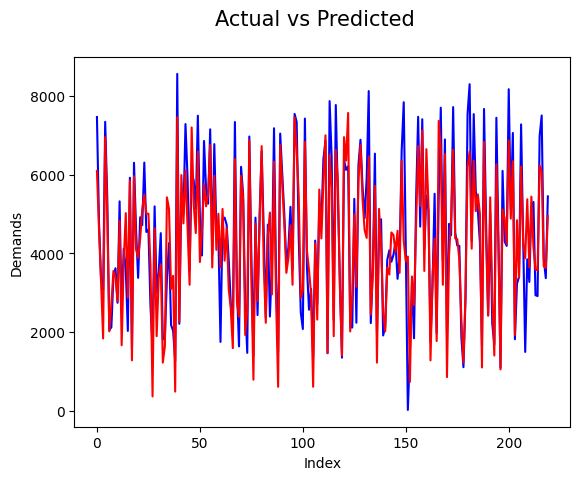

In [711]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Inference
##### - predictions for test data is very close to actuals

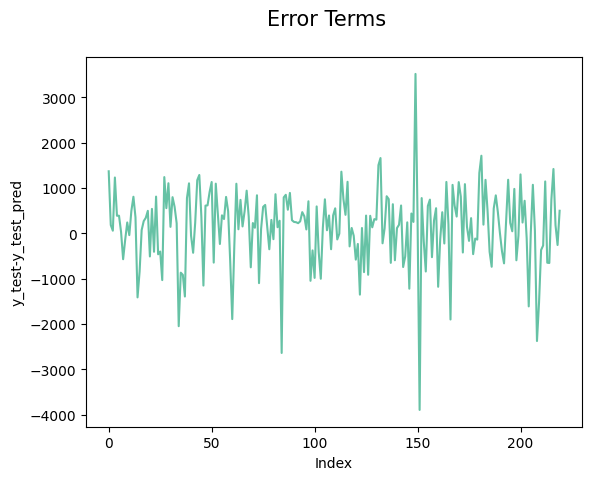

In [712]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

#### Inference
##### - error terms are independent of each other in test data

## Step 10: Making Predictions

#### R2 value for prediction on test data set(0.81) is almost equal to R2 value of train data(0.81). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

#### The company shall focus on the following features:
1. Focus on business expansion spring season onwards
2. Focus on business expansion during September month
3. There is growth seen from 2018 to 2019. Once pandamic ends , company can expect a surge as people will be allowed to come out and can expect a growth next year also
4. The will less booking during moderate weather(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) , company can work on bike maintenance.

#### Conclusion: 
#### When pendamic ends, company can expect a surge as people will be allowed to come out and can expect a growth.Hence , company shall be ready with new offers spring season and onwards when the weather is pleasant and also try to do marketing and branding during the peak month ie September month.